In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from algorithms.generalised_delta import TwoLP
from data.binary_data import generate_data_ex3, split_50, split_25, split_A
from algorithms.metrics import precision, recall

In [44]:
data = generate_data_ex3()
X, y = data[:, :2], data[:, 2]
tlp = TwoLP(nodes_num=2, output_dim=1, features_num=3, lr=0.01)
tlp.train(X, y, epochs=400, verbose=True)
X = np.c_[X, np.ones(X.shape[0])]
_, y_pred = tlp.forward_pass(X.T)
y_pred[y_pred <= 0] = -1
y_pred[y_pred > 0] = 1

Precision for A: 0.6583333333333333, for B: 0.7375
Recall for A: 0.79, for B: 0.59


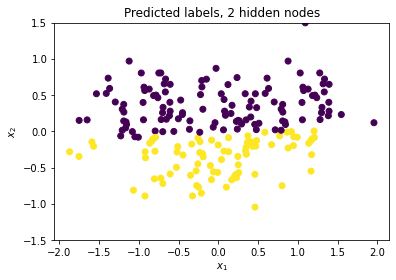

In [31]:
plt.ylim([-1.5,1.5])
plt.scatter(X[:,0],X[:,1], c=y_pred)
plt.title('Predicted labels, 2 hidden nodes')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

precision(y, y_pred)
recall(y, y_pred)

In [32]:
data = generate_data_ex3()
X, y = data[:, :2], data[:, 2]
tlp1 = TwoLP(nodes_num=4, output_dim=1, features_num=3, lr=0.01)
tlp1.train(X, y, epochs=400, verbose=True)
X = np.c_[X, np.ones(X.shape[0])]
_, y_pred = tlp1.forward_pass(X.T)
y_pred[y_pred <= 0] = -1
y_pred[y_pred > 0] = 1

Precision for A: 0.9375, for B: 0.9038461538461539
Recall for A: 0.9, for B: 0.94


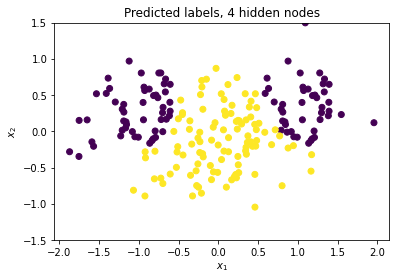

In [33]:
plt.ylim([-1.5,1.5])
plt.scatter(X[:,0],X[:,1], c=y_pred)
plt.title('Predicted labels, 4 hidden nodes')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

precision(y, y_pred)
recall(y, y_pred)

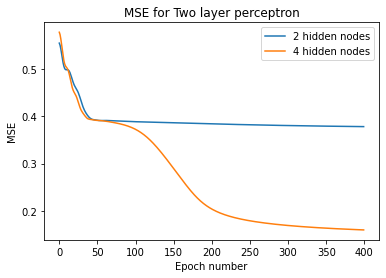

In [34]:
plt.plot(tlp.MSE, label='2 hidden nodes')
plt.plot(tlp1.MSE, label='4 hidden nodes')
plt.title('MSE for Two layer perceptron')
plt.xlabel('Epoch number')
plt.ylabel('MSE')
plt.legend()

In [7]:
# Part 2

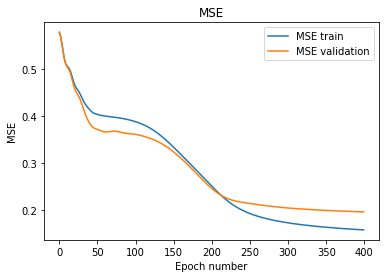

In [12]:
X_train, X_test, y_train, y_test = split_25(data)
tlp = TwoLP(nodes_num=4, output_dim=1, features_num=3, lr=0.01)
tlp.train(X_train, y_train, X_test=X_test, y_test=y_test, epochs=400, verbose=True)
plt.plot(tlp.MSE, label='MSE train')
plt.plot(tlp.MSE_val, label='MSE validation')
plt.title('MSE')
plt.xlabel('Epoch number')
plt.ylabel('MSE')
plt.legend()

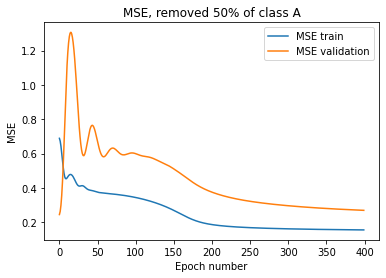

In [37]:
X_train, X_test, y_train, y_test = split_50(data, class_label=-1)
tlp = TwoLP(nodes_num=4, output_dim=1, features_num=3, lr=0.01)
tlp.train(X_train, y_train, X_test=X_test, y_test=y_test, epochs=400, verbose=True)
plt.plot(tlp.MSE, label='MSE train')
plt.plot(tlp.MSE_val, label='MSE validation')
plt.title('MSE, removed 50% of class A')
plt.xlabel('Epoch number')
plt.ylabel('MSE')
plt.legend()

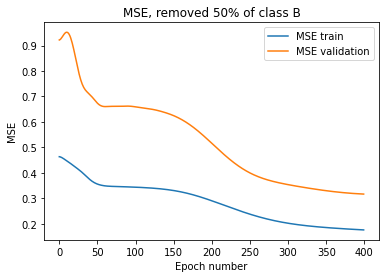

In [38]:
X_train, X_test, y_train, y_test = split_50(data, class_label=1)
tlp = TwoLP(nodes_num=4, output_dim=1, features_num=3, lr=0.01)
tlp.train(X_train, y_train, X_test=X_test, y_test=y_test, epochs=400, verbose=True)
plt.plot(tlp.MSE, label='MSE train')
plt.plot(tlp.MSE_val, label='MSE validation')
plt.title('MSE, removed 50% of class B')
plt.xlabel('Epoch number')
plt.ylabel('MSE')
plt.legend()

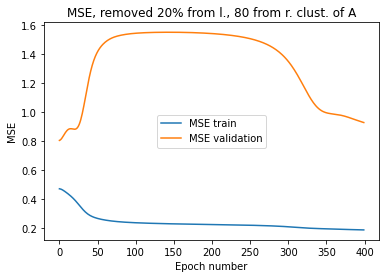

In [48]:
X_train, X_test, y_train, y_test = split_A(data)
tlp = TwoLP(nodes_num=2, output_dim=1, features_num=3, lr=0.01)
tlp.train(X_train, y_train, X_test=X_test, y_test=y_test, epochs=400, verbose=True)
plt.plot(tlp.MSE, label='MSE train')
plt.plot(tlp.MSE_val, label='MSE validation')
plt.title('MSE, removed 20% from l., 80 from r. clust. of A')
plt.xlabel('Epoch number')
plt.ylabel('MSE')
plt.legend()

Precision for A: nan, for B: nan
Recall for A: 0.0, for B: 0.0


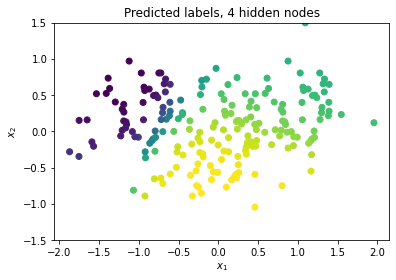

In [50]:
# X = np.c_[X, np.ones(X.shape[0])]
_, y_pred = tlp.forward_pass(X.T)
# y_pred[y_pred <= 0] = -1
# y_pred[y_pred > 0] = 1
plt.ylim([-1.5,1.5])
plt.scatter(X[:,0],X[:,1], c=y_pred)
plt.title('Predicted labels, 4 hidden nodes')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

precision(y, y_pred)
recall(y, y_pred)